In [2]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np 
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos 
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# REVISAR SUPUESTOS 

### **Ejercicio en Clase**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior. 

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

In [79]:
url = 'https://github.com/carlosjara/MCD_FAII/blob/main/RECURSOS/content/datosEmpleo.xlsx?raw=true'
#data = pd.read_excel("content/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data = pd.read_excel(url,index_col='mes',parse_dates=True)
data.head()


'''
url = 'https://github.com/carlosjara/MCD_FAII/blob/main/RECURSOS/content/06-05-Heart.csv?raw=true'
#data = pd.read_excel("content/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
df = pd.read_csv(url, sep=',')
print(df.shape)
df.head()
'''

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


In [80]:
data.columns

Index(['TD_13ciudades', 'Ocupados', 'Desocupados', 'Inactivos'], dtype='object')

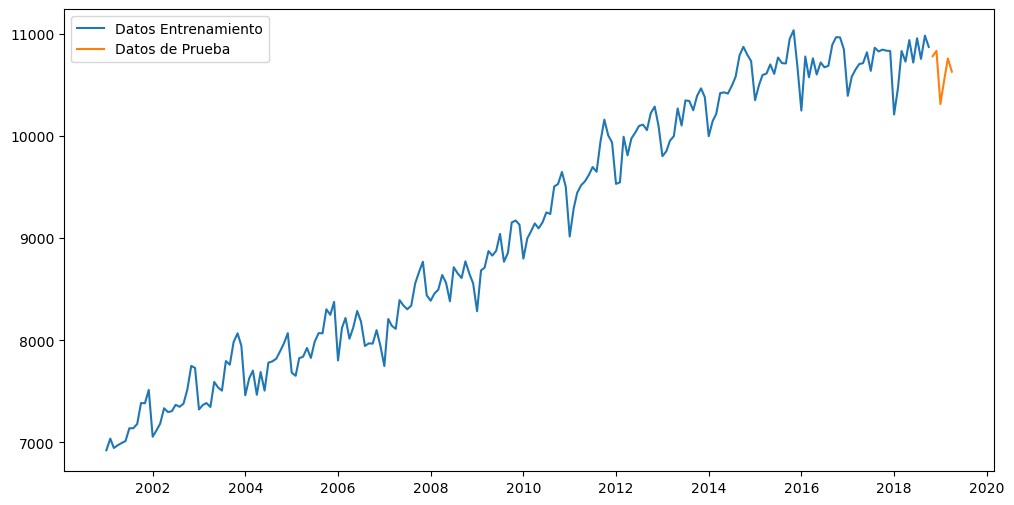

In [81]:
train_len = 214
train_td = data[["Ocupados"]][:train_len]
test_td = data[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(test_td,label="Datos de Prueba")
plt.legend()
plt.show()

In [82]:
# Como tiene tendencia debemos aplicar diferenciacion antes de pasar a los modelos

## **ACF y PACF**

In [83]:
acf(train_td['Ocupados'],40)

array([1.        , 0.97791615, 0.96080801, 0.94667826, 0.93331952,
       0.92246288, 0.90890425, 0.89895712, 0.88616889, 0.87708222,
       0.87157593, 0.86626345, 0.86077083, 0.84142836, 0.82399124,
       0.8082148 , 0.79697724, 0.78604389, 0.77291991, 0.76236066,
       0.74958796, 0.73837173, 0.73113649, 0.72434815, 0.7167177 ,
       0.69754163, 0.67796414, 0.66216212, 0.64826997, 0.63651197,
       0.62190178, 0.60943523, 0.59693407, 0.58423665, 0.57711519,
       0.57028981, 0.5606386 , 0.53938066, 0.52087047, 0.50524286,
       0.49022537])

C:\Users\CARLOS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


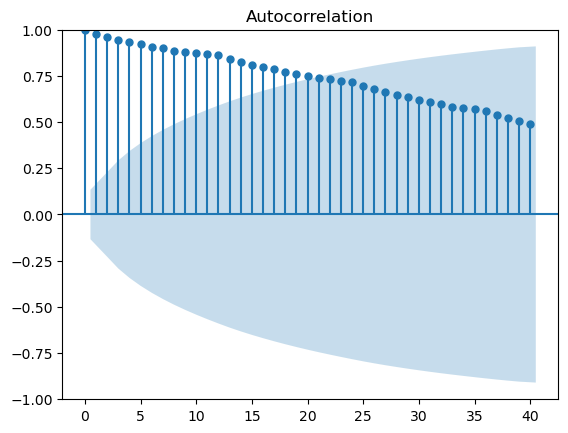

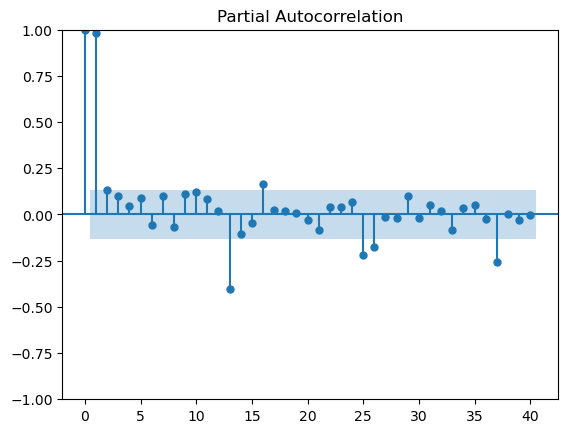

In [84]:
plot_acf(train_td['Ocupados'],lags=40);
plot_pacf(train_td['Ocupados'],lags=40);

## Auto Arima

In [85]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model_aic = auto_arima(train_td["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"))
model_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1396.275
Date:                Tue, 20 Feb 2024   AIC                           2800.549
Time:                        21:41:23   BIC                           2813.994
Sample:                    01-01-2001   HQIC                          2805.983
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3401      2.394      4.320      0.000       5.648      15.032
ar.L1          0.4455      0.096      4.657      0.000       0.258       0.633
ma.L1         -0.8728      0.048    -18.168      0.000      -0.967      -0.779
sigma2      2.871e+04   2475.431     11.598      0.000    2.39e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                48.07
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.93
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

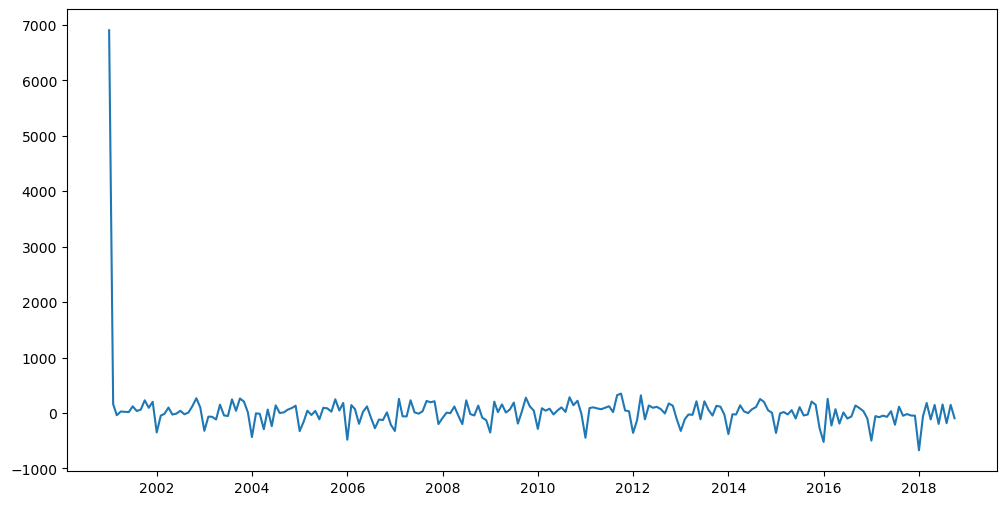

In [86]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model_aic.resid(),label="Residuales")

Como se tiene el modelo con parametro d 1 , y dado que los datos iniciales tienen tendencia, tenemos que hacer una diferenciacion de los daots

In [87]:
data_diff = data.diff() # se hace diferenciacion para eliminar la tendencia

In [88]:
data_diff.columns

Index(['TD_13ciudades', 'Ocupados', 'Desocupados', 'Inactivos'], dtype='object')

In [89]:
data_diff.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,NaN,NaN,NaN,NaN
2001-02-01,-1.052167,114.142,-86.687,-3.913
2001-03-01,-0.672648,-91.773,-94.997,210.315
2001-04-01,-1.332990,27.106,-133.686,130.160
2001-05-01,0.057078,21.383,10.583,-8.369


In [101]:
data_diff = data_diff[1:] # Se elimina el registro porque dadas las diferencaias el primer valor se pierde.
data_diff.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-03-01,-0.672648,-91.773,-94.997,210.315
2001-04-01,-1.332990,27.106,-133.686,130.160
2001-05-01,0.057078,21.383,10.583,-8.369
2001-06-01,0.708239,19.638,78.719,-74.579
2001-07-01,-1.038121,125.017,-81.920,-19.597


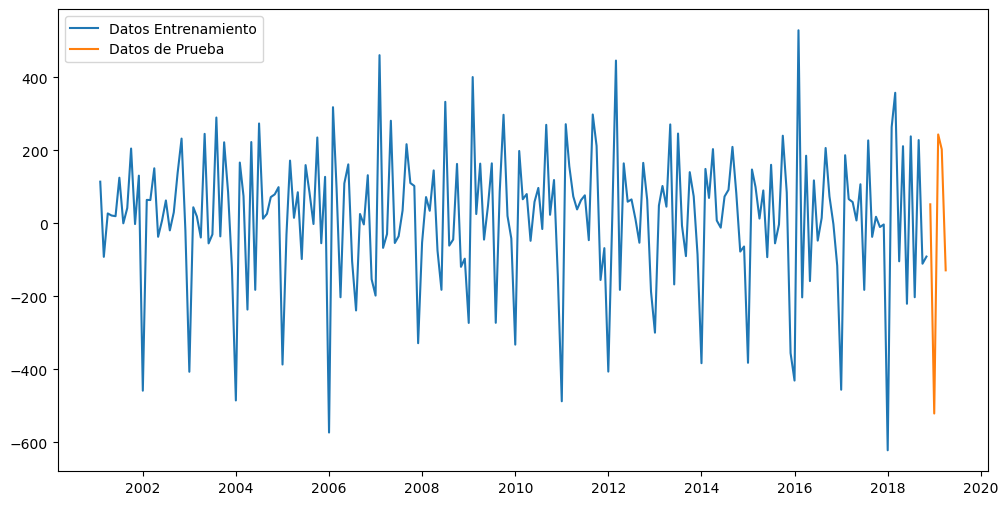

In [91]:
train_len = 214
train_tdiff = data_diff[["Ocupados"]][:train_len]
test_tdiff = data_diff[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_tdiff,label="Datos Entrenamiento")
plt.plot(test_tdiff,label="Datos de Prueba")
plt.legend()
plt.show()

In [92]:
model_aic = auto_arima(train_tdiff["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"))
model_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1402.274
Date:                Tue, 20 Feb 2024   AIC                           2812.547
Time:                        21:41:27   BIC                           2826.011
Sample:                    02-01-2001   HQIC                          2817.988
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.2326      2.372      4.313      0.000       5.583      14.883
ar.L1          0.4416      0.095      4.639      0.000       0.255       0.628
ma.L1         -0.8719      0.048    -18.157      0.000      -0.966      -0.778
sigma2      2.869e+04   2467.792     11.626      0.000    2.39e+04    3.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                46.34
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.91
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

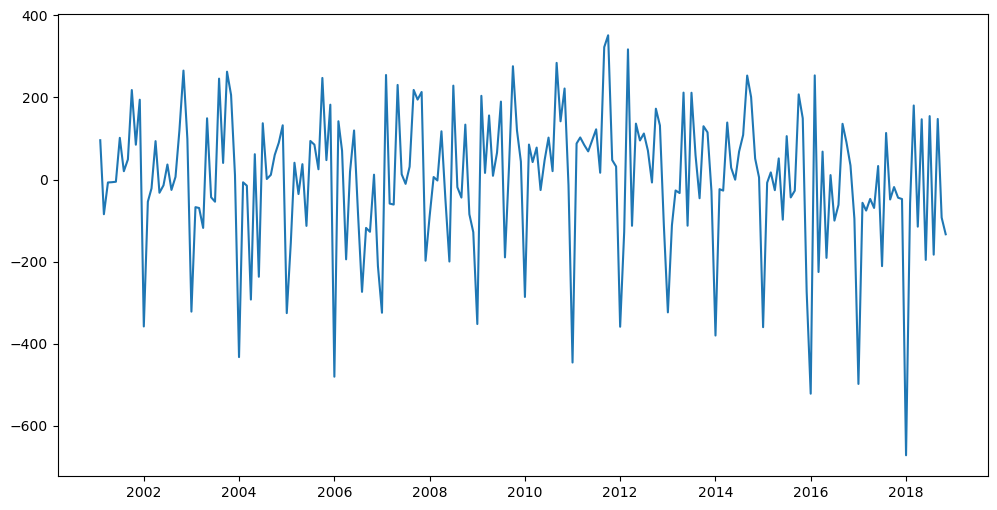

In [93]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model_aic.resid(),label="Residuales")

In [102]:
# Iterativo 
criterios = ['aicc','bic','hqic','oob','aic']
for criterio in criterios:
    model = auto_arima(train_tdiff["Ocupados"],max_p=10, max_q=10,information_criterion = criterio)
    print('CRITERIO - '+criterio+'--')
    print(model.summary())

CRITERIO - aicc--
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1402.274
Date:                Tue, 20 Feb 2024   AIC                           2812.547
Time:                        21:53:21   BIC                           2826.011
Sample:                    02-01-2001   HQIC                          2817.988
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.2326      2.372      4.313      0.000       5.583      14.883
ar.L1          0.4416      0.095      4.639      0.000       0.255       0.628
ma.L1         -0.8719      0.048  

C:\Users\CARLOS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


CRITERIO - oob--
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1402.274
Date:                Tue, 20 Feb 2024   AIC                           2812.547
Time:                        21:53:33   BIC                           2826.011
Sample:                    02-01-2001   HQIC                          2817.988
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.2326      2.372      4.313      0.000       5.583      14.883
ar.L1          0.4416      0.095      4.639      0.000       0.255       0.628
ma.L1         -0.8719      0.048   

Dados los criterios probados, se llega a que el modelo que mas se ajusta es ARIMA(1,0,1)

In [ ]:
## Calculemos metricas para comparar algun otro modelo.

## Probemos el modelo [Pruebas] 

## Autocorrelacion

model.resid()

In [98]:
signo = train_tdiff.Ocupados>0
runstest_1samp(signo, correction=False) #estadistico y probabilidad que hay por encima del estadistico

(1.4428822075422636, 0.14905365607802418)

El segundo valor corresponde al p-valor=0.149, por lo tanto considerando un 
=0.05, los resultados obtenidos no permiten rechazar la hipótesis nula, es decir, la serie y1 parece comportarse como un ruido blanco, **No presenta autocorrelación**.